In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('Social_Network_Ads.csv')

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
df.drop(columns=['User ID','Gender'],inplace=True)

In [6]:
df.sample(5)

,Age,EstimatedSalary,Purchased
58,22,18000,0
30,31,74000,0
112,38,61000,0
213,35,58000,0
367,46,88000,1


In [7]:
df.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1), df['Purchased'],test_size=0.2)

In [9]:

x_train.shape,x_test.shape

((320, 2), (80, 2))

#### standardScalar

In [10]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()


scalar.fit(x_train)


# transform
x_train_scaled = scalar.transform(x_train)
x_test_scaled= scalar.transform(x_test)

In [11]:
scalar.mean_

array([3.755000e+01, 7.034375e+04])

In [12]:
x_test_scaled

array([[ 2.16781769, -0.8340838 ],
       [ 0.23657699,  0.13702148],
       [ 1.78156955,  0.99041704],
       [-1.01872947,  0.51957811],
       [ 0.14001495,  1.04927191],
       [ 1.1056353 , -0.9223661 ],
       [ 0.8159492 ,  0.10759405],
       [-0.14967115,  1.63782056],
       [-0.24623319,  0.04873919],
       [-0.05310912,  0.28415865],
       [ 2.07125566,  0.16644892],
       [-1.11529151, -1.12835813],
       [-0.43935726, -0.03954311],
       [ 0.42970106,  0.99041704],
       [ 1.00907327, -0.86351123],
       [ 1.00907327, -1.04007583],
       [-0.8256054 , -0.80465637],
       [-0.14967115, -0.59866434],
       [-0.34279523, -0.80465637],
       [-1.59810169,  0.04873919],
       [-0.63248133,  0.54900555],
       [ 1.1056353 ,  0.54900555],
       [ 0.62282513,  2.02037719],
       [-1.11529151, -1.59919706],
       [-1.21185354, -1.42263246],
       [-0.5359193 , -1.54034219],
       [-1.79122576,  0.43129581],
       [ 2.07125566, -0.8340838 ],
       [-0.43935726,

In [13]:
x_train_scaled= pd.DataFrame(x_train_scaled,columns=x_train.columns)

In [14]:
x_test_scaled= pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [15]:
x_train_scaled
x_test_scaled

,Age,EstimatedSalary
0,2.167818,-0.834084
1,0.236577,0.137021
2,1.781570,0.990417
3,-1.018729,0.519578
4,0.140015,1.049272
...,...,...
75,-1.115292,-0.539809
76,-1.501540,-0.451527
77,0.429701,-0.186680
78,0.236577,2.108659


In [16]:
x_train.describe()

,Age,EstimatedSalary
count,320.000000,320.000000
mean,37.550000,70343.750000
std,10.372256,34035.118665
min,18.000000,15000.000000
25%,29.750000,44000.000000
50%,37.000000,70500.000000
75%,45.250000,87250.000000
max,60.000000,150000.000000


In [17]:
np.round(x_train_scaled.describe(),2)

,Age,EstimatedSalary
count,320.00,320.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.89,-1.63
25%,-0.75,-0.78
50%,-0.05,0.00
75%,0.74,0.50
max,2.17,2.34


#### effect of scalling

Text(0.5, 1.0, 'after title ')

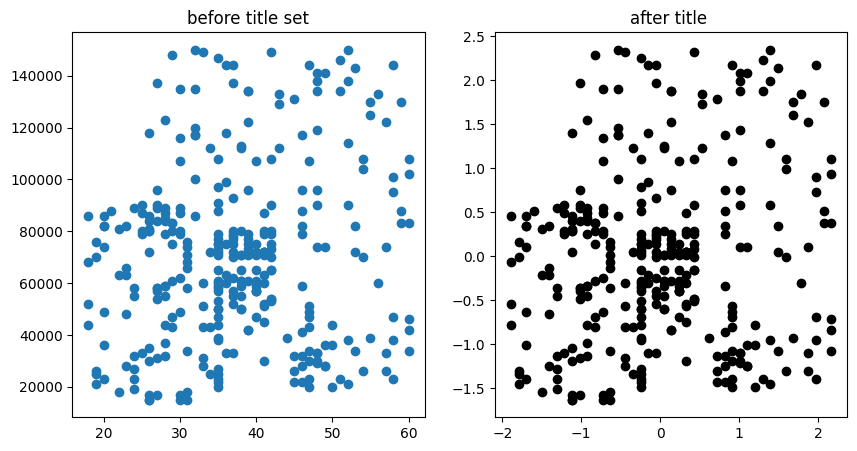

In [18]:
fig, (ax1,ax2)= plt.subplots(ncols=2,figsize=(10,5)) 
ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])
ax1.set_title("before title set")
ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color='black')
ax2.set_title("after title ")

Text(0.5, 1.0, 'after kde plot')

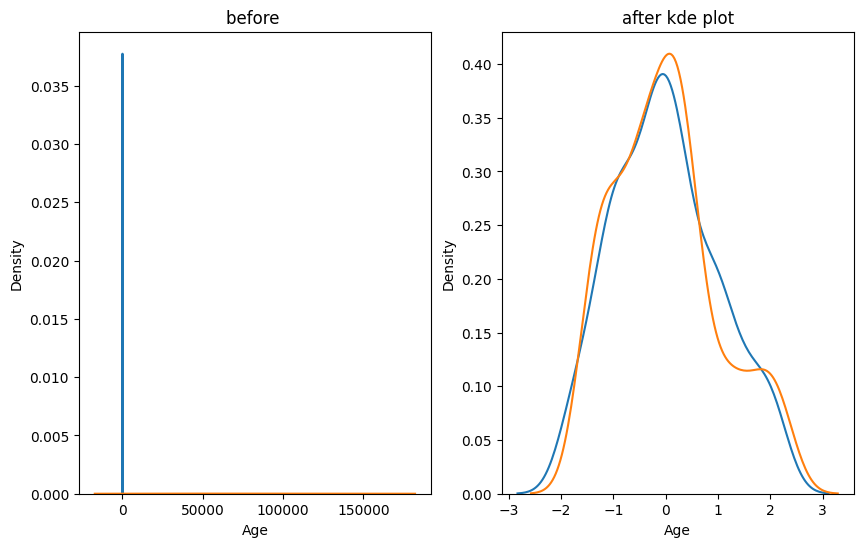

In [19]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(10,6))
sns.kdeplot(x_train['Age'],ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)
ax1.set_title("before ")

sns.kdeplot(x_train_scaled['Age'],ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2)
ax2.set_title("after kde plot")

#### why scaling is important

In [20]:
from sklearn.linear_model import LogisticRegression


In [21]:
lr= LogisticRegression()
lr_transform = LogisticRegression()

In [22]:
lr.fit(x_train,y_train)



,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [23]:
lr_transform.fit(x_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [24]:
y_pred = lr.predict(x_test)
Y_pred_scaled= lr.predict(x_test_scaled)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
print("accuracy of x_train is " ,accuracy_score(y_test,y_pred))

accuracy of x_train is  0.875


In [27]:
print("accuracy_score of x_trasform",accuracy_score(y_test,Y_pred_scaled))

accuracy_score of x_trasform 0.6125


In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
Dt= DecisionTreeClassifier()
df_transform = DecisionTreeClassifier()

In [30]:
Dt.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [31]:
y_train

285    1
206    1
81     0
103    1
151    0
      ..
249    1
161    0
347    1
290    1
144    0
Name: Purchased, Length: 320, dtype: int64

In [32]:
df_transform.fit(x_train_scaled,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [33]:
y_pred= Dt.predict(x_test)
Y_pred_scaled=df_transform.predict(x_test_scaled)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
print("actual",accuracy_score(y_test,y_pred))
print("scaled",accuracy_score(y_test,Y_pred_scaled))

actual 0.85
scaled 0.8375
